In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [2]:
df = pd.read_csv('final_eda_data.csv')
df.head(4)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2555,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4828,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3495,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3926,3


In [3]:
df.shape

(742, 33)

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [5]:
# choose relevant columns only
df_model = df[['avg_salary','Rating','Size','Type of ownership','Sector','Revenue','hourly','job_state','age','python_yn',
               'spark','aws','job_simp','seniority']]

df_model.head(4)

,avg_salary,Rating,Size,Type of ownership,Sector,Revenue,hourly,job_state,age,python_yn,spark,aws,job_simp,seniority
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),0,NM,47,1,0,0,data scientist,na
1,87.5,3.4,10000+ employees,Other Organization,Health Care,$2 to $5 billion (USD),0,MD,36,1,0,0,data scientist,na
2,85.0,4.8,501 to 1000 employees,Company - Private,Business Services,$100 to $500 million (USD),0,FL,10,1,1,0,data scientist,na
3,76.5,3.8,1001 to 5000 employees,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,WA,55,1,0,0,data scientist,na


In [6]:
df_model.shape

(742, 14)

In [7]:
df_model=df_model[df_model.Size!='-1']

In [8]:
df_model=df_model[df_model['Type of ownership']!='Unknown']

In [9]:
df_model['Size']=df_model['Size'].apply(lambda x: x.strip())
df_model['Type of ownership']=df_model['Type of ownership'].apply(lambda x: x.strip())
df_model['Sector']=df_model['Sector'].apply(lambda x: x.strip())
df_model['Revenue']=df_model['Revenue'].apply(lambda x: x.strip())
df_model['job_simp']=df_model['job_simp'].apply(lambda x: x.strip())
df_model['seniority']=df_model['seniority'].apply(lambda x: x.strip())

In [63]:
df_model['Rating'].value_counts()

 3.9    63
 3.8    61
 3.7    61
 3.5    49
 4.0    46
 3.6    46
 3.4    44
 3.3    39
 3.2    35
 4.4    33
 4.3    32
 4.7    31
 4.2    26
 3.1    25
 4.1    19
 2.9    18
 3.0    17
 2.7    14
 2.6    12
 4.6    10
-1.0    10
 4.8     9
 2.8     7
 2.4     7
 4.5     7
 5.0     5
 2.1     5
 1.9     3
 2.3     2
 2.5     2
 2.2     2
Name: Rating, dtype: int64

In [11]:
df_model.shape

(740, 14)

In [12]:
# get dummy data 
df_dum = pd.get_dummies(df_model)
df_dum.shape

(740, 109)

In [13]:
df_dum.head(4)

,avg_salary,Rating,hourly,age,python_yn,spark,aws,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,47,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,36,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,10,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,0,55,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [14]:
for i in df_dum.columns:
    print(i)

avg_salary
Rating
hourly
age
python_yn
spark
aws
Size_1 to 50 employees
Size_10000+ employees
Size_1001 to 5000 employees
Size_201 to 500 employees
Size_5001 to 10000 employees
Size_501 to 1000 employees
Size_51 to 200 employees
Size_Unknown
Type of ownership_College / University
Type of ownership_Company - Private
Type of ownership_Company - Public
Type of ownership_Government
Type of ownership_Hospital
Type of ownership_Nonprofit Organization
Type of ownership_Other Organization
Type of ownership_School / School District
Type of ownership_Subsidiary or Business Segment
Sector_-1
Sector_Accounting & Legal
Sector_Aerospace & Defense
Sector_Agriculture & Forestry
Sector_Arts, Entertainment & Recreation
Sector_Biotech & Pharmaceuticals
Sector_Business Services
Sector_Construction, Repair & Maintenance
Sector_Consumer Services
Sector_Education
Sector_Finance
Sector_Government
Sector_Health Care
Sector_Information Technology
Sector_Insurance
Sector_Manufacturing
Sector_Media
Sector_Mining 

In [15]:
# Create a dataset X and y then we will spilit the data based on train test split method.
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values
print(X.shape)
print(y.shape)

(740, 108)
(740,)


In [16]:
X.head(4)

,Rating,hourly,age,python_yn,spark,aws,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,3.8,0,47,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,3.4,0,36,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.8,0,10,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,3.8,0,55,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(592, 108)
(148, 108)
(592,)
(148,)


In [19]:
X.head(4)

,Rating,hourly,age,python_yn,spark,aws,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,3.8,0,47,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,3.4,0,36,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.8,0,10,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,3.8,0,55,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
# multiple linear regression summary checking
X_sm = XX = sm.add_constant(X)
print(X_sm.shape)
print(X.shape)

(740, 109)
(740, 108)


In [21]:
XX.head(3)

,const,Rating,hourly,age,python_yn,spark,aws,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,1.0,3.8,0,47,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1.0,3.4,0,36,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,1.0,4.8,0,10,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     12.84
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          4.53e-101
Time:                        00:13:48   Log-Likelihood:                -3347.0
No. Observations:                 740   AIC:                             6898.
Df Residuals:                     638   BIC:                             7368.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               48.9796      5.582      8.774      0.000      38.018      59.941
Rating                                               1.5609      1.784      0.875      0.382      -1.942       5.064
hourly                                             -41.1883      8.758     -4.703      0.000     -58.387     -23.990
age                                                  0.0469      0.028      1.685      0.093      -0.008       0.102
python_yn                                            7.6424      2.400      3.184      0.002       2.930      12.355
spark                                               -0.4335      2.847     -0.152      0.879      -6.024       5.156
aws                                                  0.7921      2.552      0.310      0.756      -4.219       5.803
Size_1 to 50 employees                               0.1633      5.759      0.028      0.977     -11.145      11.472
Size_10000+ employees                               -1.6353      5.007     -0.327      0.744     -11.468       8.197
Size_1001 to 5000 employees                          5.0283      3.252      1.546      0.123      -1.358      11.414
Size_201 to 500 employees                            1.2480      3.388      0.368      0.713      -5.404       7.900
Size_5001 to 10000 employees                        -3.0666      4.811     -0.637      0.524     -12.513       6.380
Size_501 to 1000 employees                          -0.0439      3.433     -0.013      0.990      -6.785       6.697
Size_51 to 200 employees                             5.2050      3.935      1.323      0.186      -2.521      12.931
Size_Unknown                                        42.0807     12.743      3.302      0.001      17.058      67.104
Type of ownership_College / University              23.2979     11.763      1.981      0.048       0.200      46.396
Type of ownership_Company - Private                  9.3523      4.342      2.154      0.032       0.827      17.878
Type of ownership_Company - Public                  11.6618      4.734      2.463      0.014       2.366      20.958
Type of ownership_Government                         6.0279     13.349      0.452      0.652     -20.185      32.240
Type of ownership_Hospital                          -7.7193      9.283     -0.832      0.406     -25.949      10.510
Type of ownership_Nonprofit Organization            -5.9650      5.868     -1.017      0.310     -17.488       5.558
Type of ownership_Other Organization                -6.0686     13.951     -0.435      0.664     -33.464      21.327
Type of ownership_School / School District           3.1671     18.193      0.174      0.862     -32.559      38.893
Type of ownership_Subsidiary or Business 

In [23]:
# Linear regression 
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.086127359407428

In [24]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.53636218854686

,alpha,error
4,0.05,-19.294046


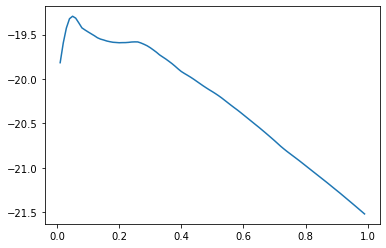

In [25]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [26]:
# random forest 
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-16.08953039233916

In [27]:
# tune models GridsearchCV 
parameters = {'n_estimators':range(1,100,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [28]:
print(gs.best_score_)
print(gs.best_estimator_)

-15.407486348031744
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=61, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [53]:
rf1 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=61, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
rf1.fit(X_train,y_train)


In [56]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

tpred_rf1 = rf1.predict(X_test)

In [57]:
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))

print(mean_absolute_error(y_test,tpred_rf1))

11517847192.441364
18.936995302032518
10.716451627619659
10.986480970138759


In [31]:
tpred_lm[1:10]

array([ 70.42260742,  48.49926758,  54.70703125,  99.33032227,
       124.62402344, 128.78100586,  47.51928711,  91.46606445,
        59.7668457 ])

In [32]:
tpred_lml[1:10]

array([ 81.14838953,  74.15332465,  70.11117341, 106.66466716,
       125.48842979, 132.00355255,  53.77881917,  89.96096253,
        67.38967761])

In [33]:
tpred_rf[1:10]

array([ 86.57845433,  49.46721311,  55.02459016,  93.74813947,
       141.22518215, 151.01639344,  48.82786885,  87.3852459 ,
        53.76229508])

In [58]:
tpred_rf1[1:10]

array([ 75.98360656,  50.08196721,  55.19535519,  94.18991023,
       132.69057377, 149.29508197,  48.13934426,  92.40983607,
        52.52459016])

In [34]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

5758923600.696268

In [35]:
for i in X.columns:
    print(i)

Rating
hourly
age
python_yn
spark
aws
Size_1 to 50 employees
Size_10000+ employees
Size_1001 to 5000 employees
Size_201 to 500 employees
Size_5001 to 10000 employees
Size_501 to 1000 employees
Size_51 to 200 employees
Size_Unknown
Type of ownership_College / University
Type of ownership_Company - Private
Type of ownership_Company - Public
Type of ownership_Government
Type of ownership_Hospital
Type of ownership_Nonprofit Organization
Type of ownership_Other Organization
Type of ownership_School / School District
Type of ownership_Subsidiary or Business Segment
Sector_-1
Sector_Accounting & Legal
Sector_Aerospace & Defense
Sector_Agriculture & Forestry
Sector_Arts, Entertainment & Recreation
Sector_Biotech & Pharmaceuticals
Sector_Business Services
Sector_Construction, Repair & Maintenance
Sector_Consumer Services
Sector_Education
Sector_Finance
Sector_Government
Sector_Health Care
Sector_Information Technology
Sector_Insurance
Sector_Manufacturing
Sector_Media
Sector_Mining & Metals
Se

In [61]:
def predict_salary(Rating,hourly,age,python_yn,spark,aws,Size,Type_of_ownership,Sector,Revenue,job_state,job_simp,seniority):    
    
    Size_index = np.where(X.columns==Size)[0][0]
    TOO_index = np.where(X.columns==Type_of_ownership)[0][0]
    Sector_index = np.where(X.columns==Sector)[0][0]
    Revenue_index = np.where(X.columns==Revenue)[0][0]
    job_state_index = np.where(X.columns==job_state)[0][0]
    job_simp_index = np.where(X.columns==job_simp)[0][0]
    seniority_index = np.where(X.columns==seniority)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Rating
    x[1] = hourly
    x[2] = age
    x[3] = python_yn
    x[4] = spark
    x[5] = aws
 
    if Size_index >= 0:
        x[Size_index] = 1
    if TOO_index >= 0:
        x[TOO_index] = 1
    if Sector_index >= 0:
        x[Sector_index] = 1        
    if Revenue_index >= 0:
        x[Revenue_index] = 1
    if job_state_index >= 0:
        x[job_state_index] = 1
    if job_simp_index >= 0:
        x[job_simp_index] = 1 
    if seniority_index >= 0:
        x[seniority_index] = 1         
      
    return rf1.predict([x])[0]

In [50]:
Size_index = np.where(X.columns=='Size_1 to 50 employees')[0][0]
Size_index

6

In [62]:
predict_salary(3.8,0,47,1,0,0,'Size_501 to 1000 employees','Type of ownership_Company - Private','Sector_Aerospace & Defense',
               'Revenue_$50 to $100 million (USD)','job_state_NM','job_simp_data scientist','seniority_na')   

#3.8	501 to 1000 employees	Company - Private	Aerospace & Defense	 50𝑡𝑜 100 million (USD)	0	NM	47	1	0	0	data scientist	na    

80.11475409836065

In [39]:
[col.lower() for col in X.columns if col.startswith("Size")]

['size_1 to 50 employees',
 'size_10000+ employees',
 'size_1001 to 5000 employees',
 'size_201 to 500 employees',
 'size_5001 to 10000 employees',
 'size_501 to 1000 employees',
 'size_51 to 200 employees',
 'size_unknown']

In [48]:
import json
columns = {'all_columns' : [col.lower() for col in X.columns] }
with open("all_columns.json","w") as f:
    f.write(json.dumps(columns))

import json
columns = {'size_columns' : [col.lower() for col in X.columns if col.startswith("Size")] }
with open("size_columns.json","w") as f:
    f.write(json.dumps(columns))

In [41]:
import json
columns = {'Type_columns' : [col.lower() for col in X.columns if col.startswith("Type")] }
with open("Type_columns.json","w") as f:
    f.write(json.dumps(columns))
    
import json
columns = {'Sector_columns' : [col.lower() for col in X.columns if col.startswith("Sector")] }
with open("sector_columns.json","w") as f:
    f.write(json.dumps(columns))    

In [42]:
import json
columns = {'Revenue_columns' : [col.lower() for col in X.columns if col.startswith("Revenue")] }
with open("Revenue_columns.json","w") as f:
    f.write(json.dumps(columns))
       
columns = {'job_state_columns' : [col.lower() for col in X.columns if col.startswith("job_state")] }
with open("job_state_columns.json","w") as f:
    f.write(json.dumps(columns))

columns = {'job_simp_columns' : [col.lower() for col in X.columns if col.startswith("job_simp")] }
with open("job_simp_columns.json","w") as f:
    f.write(json.dumps(columns)) 

columns = {'seniority_columns' : [col.lower() for col in X.columns if col.startswith("seniority")] }
with open("seniority_columns.json","w") as f:
    f.write(json.dumps(columns))     

In [59]:
import pickle
with open('final_model_file_rf.pickle','wb') as f:
    pickle.dump(rf1,f)

In [43]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'final_model_file_rf' + ".p", "wb" ) )


In [44]:
file_name = "final_model_file_rf.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']
    
rf_p = model.predict(X_test)    

In [45]:
rf_p[1:10]

array([ 86.57845433,  49.46721311,  55.02459016,  93.74813947,
       141.22518215, 151.01639344,  48.82786885,  87.3852459 ,
        53.76229508])

In [47]:
file_name = "final_model_file_rf.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[2.1,
 0.0,
 17.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]